### Trabalho Final de Programação - 2020.1 ###
#### Programa de Mestrado em Informática - PUC-Rio ####

Professor Orientador: Marcelo Gattass

Professor Co-orientador: Helio Cortes Vieira Lopes

Aluno: Waldir José Pereira Junior

Matrícula: 1820998

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

from services.transformacaoDadosService import TransformacaoDadosService
transformacaoDadosService = TransformacaoDadosService()

Inicializando o TransformacaoDadosService.


#### Leitura do cronograma em Excel ####

In [2]:
df = transformacaoDadosService.importaPlanilhaEGeraDataFrameComDados('data/Escopo_Integracao_DELFOS_Cronograma_Pocos-SPO.xlsx', 'Dados do escopo (DELFOS)')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 58 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Prefixo do recurso                       657 non-null    object        
 1   Nome do recurso                          175 non-null    object        
 2   Código único                             20 non-null     object        
 3   Projeto                                  657 non-null    object        
 4   Locações (Subprojeto)                    657 non-null    object        
 5   Ponto geográfico                         657 non-null    object        
 6   Tipo de serviço                          657 non-null    object        
 7   Subtipo de serviço                       141 non-null    object        
 8   Tipo de atividade                        657 non-null    object        
 9   Nome da atividade                        65

### Tratamentos ###

Este arquivo é gerado por atividades/tarefas. 

Primeiramente somente as atividades de perfuração serão mantidas (removendo atividades de completação, workover e avaliação)

In [4]:
df = transformacaoDadosService.mantemApenasAtividadesPerfuracao(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 614
Data columns (total 58 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Prefixo do recurso                       368 non-null    object        
 1   Nome do recurso                          80 non-null     object        
 2   Código único                             0 non-null      object        
 3   Projeto                                  368 non-null    object        
 4   Locações (Subprojeto)                    368 non-null    object        
 5   Ponto geográfico                         368 non-null    object        
 6   Tipo de serviço                          368 non-null    object        
 7   Subtipo de serviço                       75 non-null     object        
 8   Tipo de atividade                        368 non-null    object        
 9   Nome da atividade                        36

In [6]:
df.head()

,Prefixo do recurso,Nome do recurso,Código único,Projeto,Locações (Subprojeto),Ponto geográfico,Tipo de serviço,Subtipo de serviço,Tipo de atividade,Nome da atividade,...,Porto de embarque,IUPI do projeto de investimento,Tipo de ponto geográfico,Tipo de tarefa,Tarefa probabilística/determinística,Prefixo do recurso na base integrada,Status de contratação do recurso,Tipo de recurso,Subtipo de recurso,Tipo posicionamento do recurso
0,NS-2400-LB-03,NaN,NaN,MERO 2,LB2NW.P2,LB2NW-P2,Perfuração,NaN,Movimentação,DMM,...,NaN,DP-14-0075,Poço atual / Objetivo Final,Perfuração THD,Não definida,NaN,Necessidade,Sonda,Sonda flutuante (semissub ou navio-sonda),Dinâmico
1,NS-2400-LB-03,NaN,NaN,MERO 2,LB2NW.P2,LB2NW-P2,Perfuração,NaN,Perfuração,"PERFURACAO 28"" COM ALARGADOR 42""",...,NaN,DP-14-0075,Poço atual / Objetivo Final,Perfuração THD,Não definida,NaN,Necessidade,Sonda,Sonda flutuante (semissub ou navio-sonda),Dinâmico
2,NS-2400-LB-03,NaN,NaN,MERO 2,LB2NW.P2,LB2NW-P2,Perfuração,NaN,Rev/cim,"REV/CIM 36""",...,NaN,DP-14-0075,Poço atual / Objetivo Final,Perfuração THD,Não definida,NaN,Necessidade,Sonda,Sonda flutuante (semissub ou navio-sonda),Dinâmico
3,NS-2400-LB-03,NaN,NaN,MERO 2,LB2NW.P2,LB2NW-P2,Perfuração,NaN,Perfuração,"PERFURACAO 28""",...,NaN,DP-14-0075,Poço atual / Objetivo Final,Perfuração THD,Não definida,NaN,Necessidade,Sonda,Sonda flutuante (semissub ou navio-sonda),Dinâmico
4,NS-2400-LB-03,NaN,NaN,MERO 2,LB2NW.P2,LB2NW-P2,Perfuração,NaN,Rev/cim,"REV/CIM 22""",...,NaN,DP-14-0075,Poço atual / Objetivo Final,Perfuração THD,Não definida,NaN,Necessidade,Sonda,Sonda flutuante (semissub ou navio-sonda),Dinâmico


Um novo dataframe agrupado por poço será gerado.

In [7]:
df_ajustado = transformacaoDadosService.geraDataFrameAgrupadoPorPoco(df)

In [8]:
df_ajustado.head()

,Ponto geográfico,Projeto,Possui contingente,Duração,Coordenador CIPP,Ativo,Bloco/Campo,Tipo de óleo,Região/Bacia,Natureza do projeto,...,Cessão onerosa,SICAR,Rodada ANP,Formação possui Carbonato,Formação possui Arenito,LDA Max,Demandante,Tipo de completação inferior,Demanda CATS Firme,Necessita SCC
0,1-RJS-685,MERO 1,True,58.0,CTNT,UN-RIO/ATP-MERO,MERO,N/D,SANTOS,NaN,...,False,SP0200A,PARTILHA - ROUND 1,True,False,2400.0,Libra,Tubo Furado + CI,False,False
1,3-ESS-142,MERO 1,False,88.0,CTNT,UN-RIO/ATP-MERO,MERO,N/D,SANTOS,NaN,...,False,SP0200A,PARTILHA - ROUND 1,True,False,2400.0,Libra,NaN,False,False
2,3-ESS-144,MERO 1,False,81.0,CTNT,UN-RIO/ATP-MERO,MERO,N/D,SANTOS,NaN,...,False,SP0200A,PARTILHA - ROUND 1,True,False,2400.0,Libra,Tubo Furado + CI,False,False
3,3-ESS-155,MERO 1,False,81.0,CTNT,UN-RIO/ATP-MERO,MERO,N/D,SANTOS,NaN,...,False,SP0200A,PARTILHA - ROUND 1,True,False,2400.0,Libra,NaN,False,False
4,3-RJS-360,MERO 1,False,201.0,CTNT,UN-RIO/ATP-MERO,MERO,N/D,SANTOS,NaN,...,False,SP0200A,PARTILHA - ROUND 1,False,False,0.0,Libra,NaN,False,False


### Preparação para clusterização ###

#### Transformação de dados categóricos ####

In [9]:
df_categorico = transformacaoDadosService.transformaDadosCategoricos(df_ajustado)
df_categorico.dtypes

Projeto                         category
Possui contingente                  bool
Duração                          float64
Coordenador CIPP                category
Ativo                           category
Bloco/Campo                     category
Tipo de óleo                    category
Região/Bacia                    category
Natureza do projeto             category
Tipo de locação                 category
Projeto pré-sal                     bool
Cessão onerosa                      bool
SICAR                           category
Rodada ANP                      category
Formação possui Carbonato           bool
Formação possui Arenito             bool
LDA Max                          float64
Demandante                      category
Tipo de completação inferior    category
Demanda CATS Firme                  bool
Necessita SCC                       bool
Poço Injetor                        bool
Poço Produtor                       bool
Poço Especial                       bool
dtype: object

#### Transformação de dados categóricos em dados numéricos ####

In [10]:
df_numerico = transformacaoDadosService.transformaDadosCategoricosEmDadosNumericos(df_categorico)

df_numerico.head()

,Possui contingente,Duração,Projeto pré-sal,Cessão onerosa,Formação possui Carbonato,Formação possui Arenito,LDA Max,Demanda CATS Firme,Necessita SCC,Poço Injetor,...,Tipo de locação_Poço Produtor de óleo,SICAR_SP0200A,SICAR_SP0201A,SICAR_SP0202A,SICAR_SP0204A,Rodada ANP_PARTILHA - ROUND 1,Demandante_Libra,Tipo de completação inferior_A DEFINIR,Tipo de completação inferior_Rev Canhoneado + CI 3 zonas,Tipo de completação inferior_Tubo Furado + CI
0,1,58.0,0,0,1,0,2400.0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
1,0,88.0,0,0,1,0,2400.0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,0,81.0,0,0,1,0,2400.0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
3,0,81.0,0,0,1,0,2400.0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0,201.0,0,0,0,0,0.0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


To give equal importance to all features, we need to scale the continuous features. We will be using scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary and continuous features . Other alternatives includes StandardScaler.

In [11]:
#https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def transforma(x):
    mms = MinMaxScaler()
    mms.fit(x)
    return mms.transform(x)

#df_transformado = transforma(df_numerico)
df_transformado = df_numerico.values
df_transformado

array([[  1.,  58.,   0., ...,   0.,   0.,   1.],
       [  0.,  88.,   0., ...,   0.,   0.,   0.],
       [  0.,  81.,   0., ...,   0.,   0.,   1.],
       ...,
       [  0.,  83.,   0., ...,   0.,   0.,   0.],
       [  0., 114.,   0., ...,   0.,   0.,   0.],
       [  0., 118.,   0., ...,   0.,   0.,   0.]])

### Calculando o K ideal (utilizando K-Means) ###

In [12]:
#https://stackoverflow.com/a/59962760/4784342
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,15)
elbow = []
ss = []
for n_clusters in range_n_clusters:
    #iterating through cluster sizes
    clusterer = KMeans(n_clusters = n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df_transformado)
    silhouette_avg = silhouette_score(df_transformado, cluster_labels)
    ss.append(silhouette_avg)
    elbow.append(clusterer.inertia_)

As k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

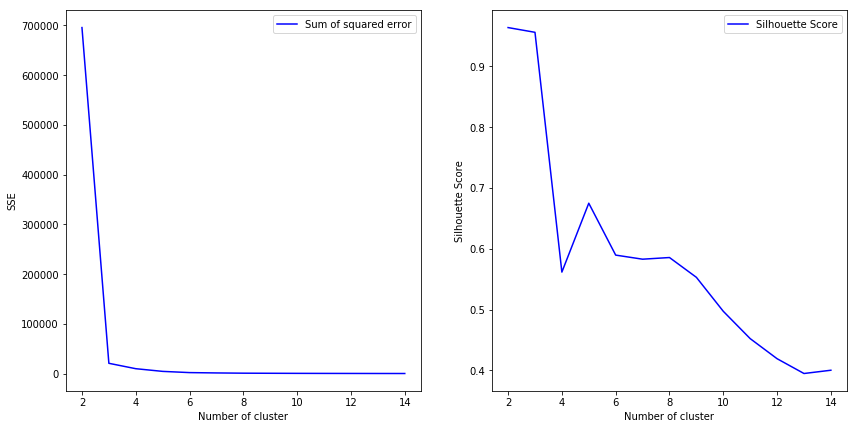

In [13]:
#https://stackoverflow.com/a/59962760/4784342
fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(122)
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

### Calculando os medoids ###

#### Inicialização ####
Escolhendo aleatoriamente k medoids

In [14]:
df_size = len(df_numerico)

np.random.seed(123)
initial_medoids = np.random.randint(df_size, size=3).tolist()

initial_medoids

[2, 28, 17]

### Calculando clusters através do K-Medoids ###

In [15]:
x = df_numerico.iloc[:].values

In [16]:
from sklearn_extra.cluster import KMedoids
from pyclustering.utils import timedcall, distance_metric, type_metric
metric = distance_metric(type_metric.EUCLIDEAN_SQUARE, data=x)
kmedoids = KMedoids(n_clusters=3, random_state=0,metric=metric).fit(x)
labels = kmedoids.labels_

clusters_2 = []
for i in range(kmedoids.n_clusters):
    clusters_2.append([])
i = 0
for label in labels:
    clusters_2[label].append(i)
    i = i + 1
clusters_2

[[1, 2, 3, 5, 7, 8, 9, 11, 14, 15, 16, 17, 18, 24, 25, 26, 27, 28, 29, 30, 31],
 [0, 10, 13, 19, 20, 21, 22, 23],
 [4, 6, 12, 32, 33]]

#### Salvando dados dos clusters no MongoDB ####

In [17]:
from services.mongoDbService import MongoDbService
from projeto import configuracoes

cluster_id = 0
clusters_json = []
for cluster_indexes in clusters_2:
    listaNomesPGs = (df_ajustado.take(cluster_indexes)['Ponto geográfico']).tolist()
    clusters_json.append({'Cluster': cluster_id, 'NomesPontosGeograficos': listaNomesPGs})
    cluster_id = cluster_id + 1

mongoDbService = MongoDbService(configuracoes)
documentos_inseridos = mongoDbService.grava(clusters_json)
print("documentos_inseridos: ", documentos_inseridos)

documentos_inseridos:  <pymongo.results.InsertManyResult object at 0x000001D4EC4C0D88>


#### Imprimindo os clusters gerados ####

In [18]:
i = 0
for cluster_indexes in clusters_2:
    print('Cluster ', i)
    print(df_ajustado.take(cluster_indexes)['Ponto geográfico'].tolist())
    print('------')
    i = i + 1

Cluster  0
['3-ESS-142', '3-ESS-144', '3-ESS-155', '8-MRO-8-RJS', 'LB1NW-I4', 'LB1NW-I9', 'LB1NW-P8', 'LB2NW-I5', 'LB2NW-P1', 'LB2NW-P2', 'LB2NW-P3', 'LB2NW-P6', 'LB2NW-P8', 'LB3NW-P6', 'MERO 3.LB3NW.I5', 'MERO 4.LB4NW.I2', 'MERO 4.LB4NW.I3', 'MERO 4.LB4NW.I4', 'MERO 4.LB4NW.I5', 'MERO 4.LB4NW.I8', 'MERO 4.LB4NW.P3']
------
Cluster  1
['1-RJS-685', 'LB2NW-I2', 'LB2NW-I8', 'LB3NW-I3', 'LB3NW-I4', 'LB3NW-I7', 'LB3NW-P3', 'LB3NW-P5']
------
Cluster  2
['3-RJS-360', '9-MRO-9D-RJS', 'LB2NW-I6', 'MERO 4.LB4NW.P5', 'MERO 4.LB4NW.P8']
------


### Salvando o modelo em arquivo ###

In [19]:
#https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
import pickle

# save the model to disk
filename = 'finalized_model.sav'
filehandler = open(filename, 'wb')
pickle.dump(kmedoids, filehandler)
filehandler.close()

#### Buscando um ponto de cada cluster, para testar o modelo ####

In [20]:
df_numerico[1:2]

,Possui contingente,Duração,Projeto pré-sal,Cessão onerosa,Formação possui Carbonato,Formação possui Arenito,LDA Max,Demanda CATS Firme,Necessita SCC,Poço Injetor,...,Tipo de locação_Poço Produtor de óleo,SICAR_SP0200A,SICAR_SP0201A,SICAR_SP0202A,SICAR_SP0204A,Rodada ANP_PARTILHA - ROUND 1,Demandante_Libra,Tipo de completação inferior_A DEFINIR,Tipo de completação inferior_Rev Canhoneado + CI 3 zonas,Tipo de completação inferior_Tubo Furado + CI
1,0,88.0,0,0,1,0,2400.0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [21]:
#pegando um registro qualquer para verificar se a predição está correta
df_de_registro_teste_cluster_0 = pd.DataFrame(df_numerico[1:2])
df_de_registro_teste_cluster_1 = pd.DataFrame(df_numerico[4:5])
df_de_registro_teste_cluster_2 = pd.DataFrame(df_numerico[0:1])
df_de_registro_teste_transformado_cluster_0 = df_de_registro_teste_cluster_0.values
df_de_registro_teste_transformado_cluster_1 = df_de_registro_teste_cluster_1.values
df_de_registro_teste_transformado_cluster_2 = df_de_registro_teste_cluster_2.values
print(df_de_registro_teste_transformado_cluster_0)
print(df_de_registro_teste_transformado_cluster_1)
print(df_de_registro_teste_transformado_cluster_2)

[[0.0e+00 8.8e+01 0.0e+00 0.0e+00 1.0e+00 0.0e+00 2.4e+03 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 0.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00 1.0e+00
  1.0e+00 1.0e+00 1.0e+00 1.0e+00 0.0e+00 0.0e+00 1.0e+00 0.0e+00 1.0e+00
  0.0e+00 0.0e+00 0.0e+00 1.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00]]
[[  0. 201.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
    0.   0.   0.   1.   1.   1.   1.   1.   0.   0.   0.   1.   1.   0.
    0.   0.   1.   1.   0.   0.   0.]]
[[1.0e+00 5.8e+01 0.0e+00 0.0e+00 1.0e+00 0.0e+00 2.4e+03 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 0.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00 1.0e+00
  1.0e+00 1.0e+00 1.0e+00 1.0e+00 0.0e+00 0.0e+00 1.0e+00 0.0e+00 1.0e+00
  0.0e+00 0.0e+00 0.0e+00 1.0e+00 1.0e+00 0.0e+00 0.0e+00 1.0e+00]]


#### Testando os pontos no modelo em memória e obtendo resultado correto ####

In [24]:
result_cluster_0 = kmedoids.predict(df_de_registro_teste_transformado_cluster_0)
result_cluster_1 = kmedoids.predict(df_de_registro_teste_transformado_cluster_1)
result_cluster_2 = kmedoids.predict(df_de_registro_teste_transformado_cluster_2)
print("cluster do result_cluster_0: ", result_cluster_0)
print("cluster do result_cluster_1: ", result_cluster_1)
print("cluster do result_cluster_2: ", result_cluster_2)

cluster do result_cluster_0:  [0]
cluster do result_cluster_1:  [2]
cluster do result_cluster_2:  [1]


#### Testando os pontos no modelo buscado em arquivo e obtendo resultado correto ####

In [26]:
filename = 'finalized_model.sav'
filehandler = open(filename, 'rb')
loaded_model = pickle.load(filehandler)
filehandler.close()
result_saved_model_cluster_0 = loaded_model.predict(df_de_registro_teste_transformado_cluster_0)
result_saved_model_cluster_1 = loaded_model.predict(df_de_registro_teste_transformado_cluster_1)
result_saved_model_cluster_2 = loaded_model.predict(df_de_registro_teste_transformado_cluster_2)
print("cluster do result_saved_model_cluster_0 (que deve ser o mesmo de result_cluster_0): ", result_saved_model_cluster_0)
print("cluster do result_saved_model_cluster_1 (que deve ser o mesmo de result_cluster_1): ", result_saved_model_cluster_1)
print("cluster do result_saved_model_cluster_2 (que deve ser o mesmo de result_cluster_2): ", result_saved_model_cluster_2)

cluster do result_saved_model_cluster_0 (que deve ser o mesmo de result_cluster_0):  [0]
cluster do result_saved_model_cluster_1 (que deve ser o mesmo de result_cluster_1):  [2]
cluster do result_saved_model_cluster_2 (que deve ser o mesmo de result_cluster_2):  [1]
